<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Amazon Web Services;</li>
  <li>AWS IAM;</li>
  <li>AWS S3;</li>
  <li>AWS Athena.</li>
</ol>

---

# **Exercícios**

## 1\. Amazon Web Services

 1. Crie uma conta na [AWS](https://portal.aws.amazon.com/);
 1. Acesse a sua conta e selecione a região mais próxima da sua residência.

## 2\. AWS S3

Replique as atividades do item 3.3 em sua conta.


### **3.3. Atividade**
 - Criar um *bucket*;
 - Inserir um objeto no *bucket*.


 Como objeto, gere o arquivo `iris.csv` com os códigos abaixo.

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.to_csv('iris.csv', index=False, header=False)

## 3\. AWS Athena

### **4.3. Atividade**

Replique as atividades do item 4.3 em sua conta.

 - Criar um *bucket* no AWS [S3](https://aws.amazon.com/pt/s3/) para armazenar os resultados;
 - Configurar o AWS [Athena](https://aws.amazon.com/pt/athena/) para utilizar o *bucket* criado;
 - Criar uma tabela (com SQL) utilizando o *bucket* da aula 3, item 3.3;
 - Executar uma consulta SQL.

QUERY 1: Código SQL para criar a tabela.

```sql
CREATE EXTERNAL TABLE iris (
  sepal_length double,
  sepal_width double,
  petal_length double,
  petal_width double,
  specie string
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar'=',')
LOCATION 's3://<bucket-name>/'
```

**Resultado Query 1:**


Resultado Query-1:Criando tabela.

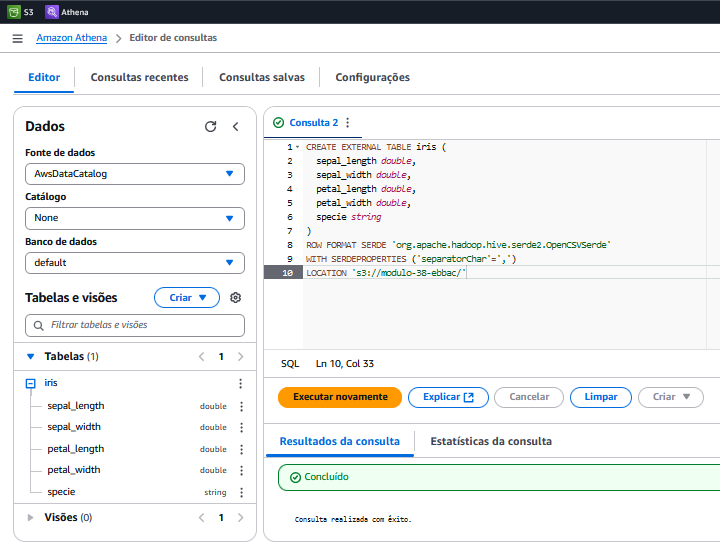

Query 2: Códigos SQL para executar consultas. Quais são os primeiros 10 registros na tabela 'iris'?

```sql
 Query- 2  SELECT * FROM iris LIMIT 10;
```

**Resultado Query 2:**


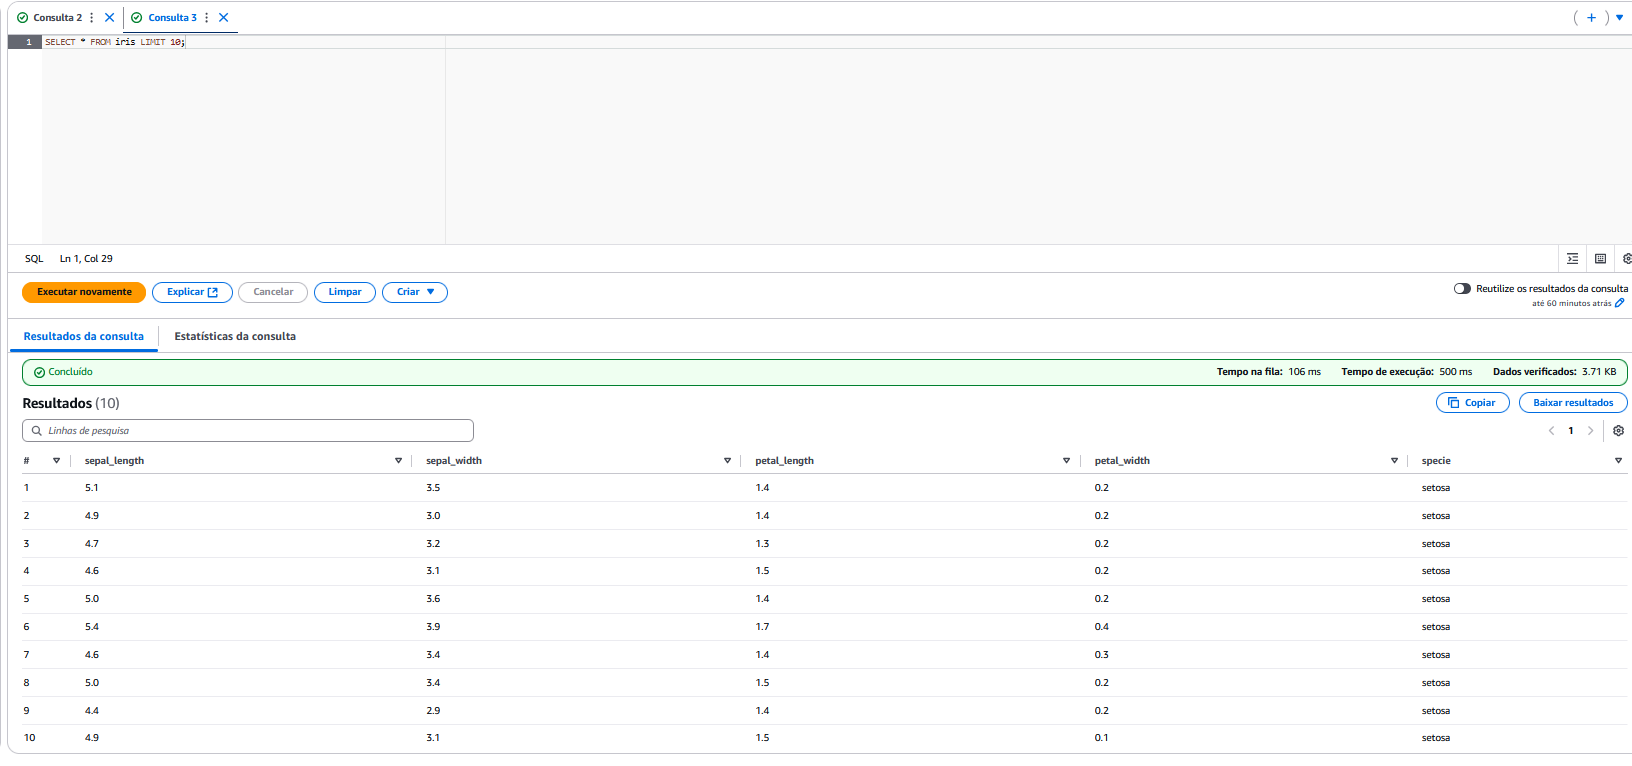

 Query 3: Quais são as médias dos comprimentos e larguras das sépalas e pétalas para cada espécie na tabela 'iris'?

  A query 3 agrupa os dados da tabela "iris" pela coluna "specie" e calcula a média das medidas (comprimento e largura das sépalas e das pétalas) para cada espécie, arredondando esses valores para quatro casas decimais.



```sql
SELECT
    specie,
    round(avg(sepal_length), 4) as avg_sepal_length,
    round(avg(sepal_width),  4) as avg_sepal_width,
    round(avg(petal_length), 4) as avg_petal_length,
    round(avg(petal_width),  4) as avg_petal_width
FROM iris
GROUP BY specie;
```

**Resultado Query 3:**


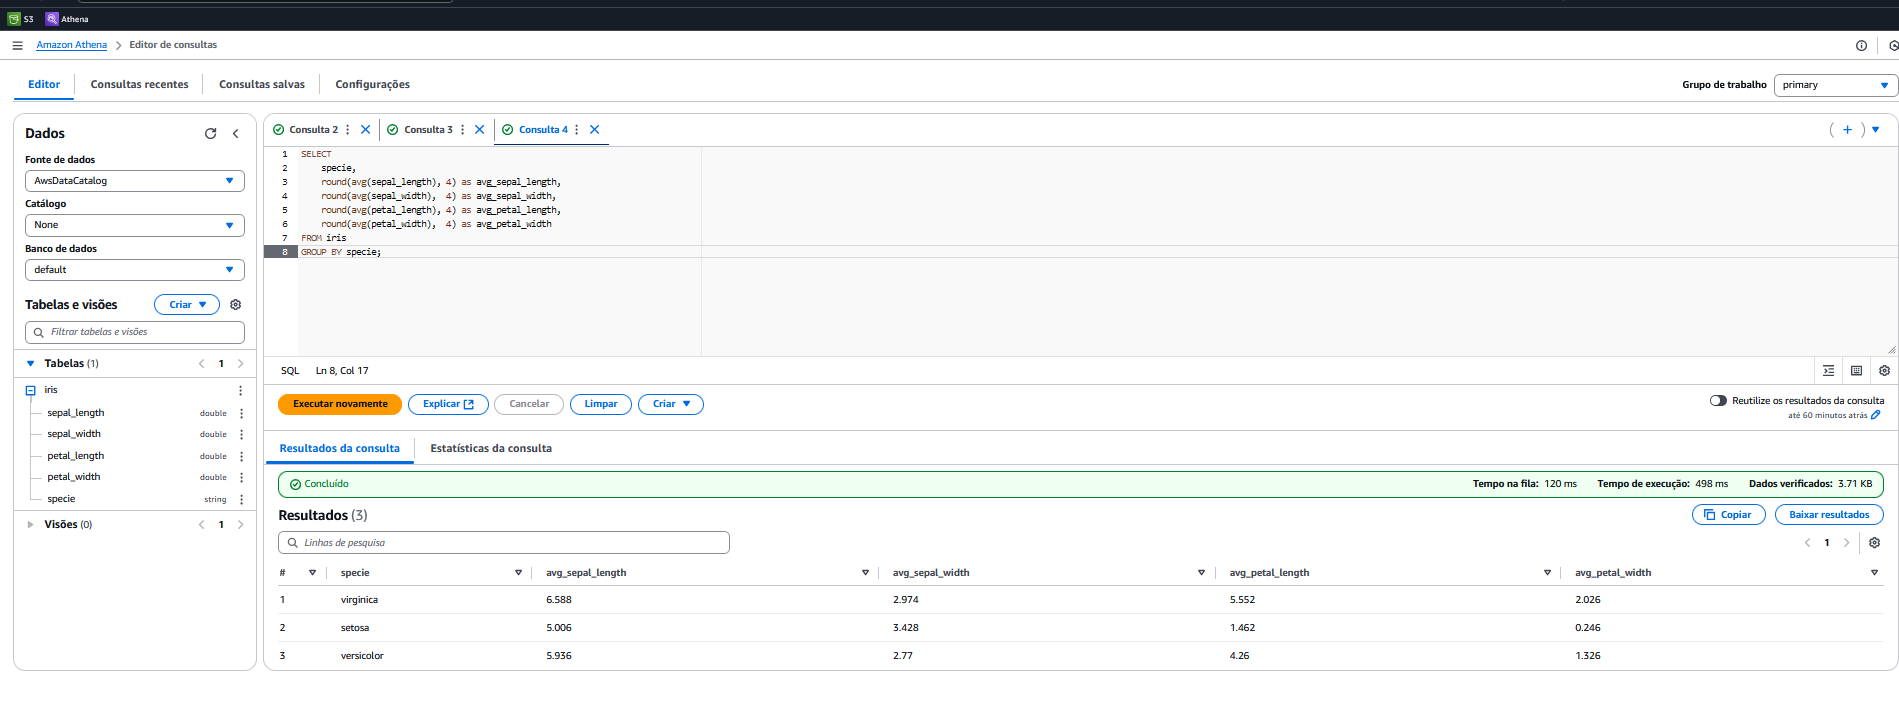


**A partir do resultado da consulta, podemos obter vários insights valiosos sobre as diferentes espécies de flores na tabela "iris":**

    Virginica:

        Tem, em média, o maior comprimento de sépala (6.588) e comprimento de pétala (5.552) entre as três espécies.

        As sépalas são relativamente longas, mas as pétalas também são largas, com uma largura média de 2.026.

    Setosa:

        Apresenta as menores medidas em termos de comprimento e largura de pétalas (1.462 e 0.246, respectivamente), indicando que as flores desta espécie têm pétalas bem menores em comparação com as outras duas espécies.

        Tem a maior largura média de sépala (3.428), o que pode ser uma característica distinta desta espécie.

    Versicolor:

        Possui médias intermediárias para todas as medidas, com comprimentos de sépala (5.936) e pétala (4.26) e larguras de sépala (2.77) e pétala (1.326) situando-se entre os valores observados para as espécies Virginica e Setosa.

**Principais insights:**

    A espécie Virginica se destaca pelo maior tamanho geral das flores (maiores comprimentos e larguras de pétalas).

    A espécie Setosa é identificada por suas pétalas menores e sépalas mais largas.

    A espécie Versicolor possui características intermediárias, o que pode indicar uma diversidade maior dentro da espécie ou uma transição entre as características das outras duas espécies.